In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

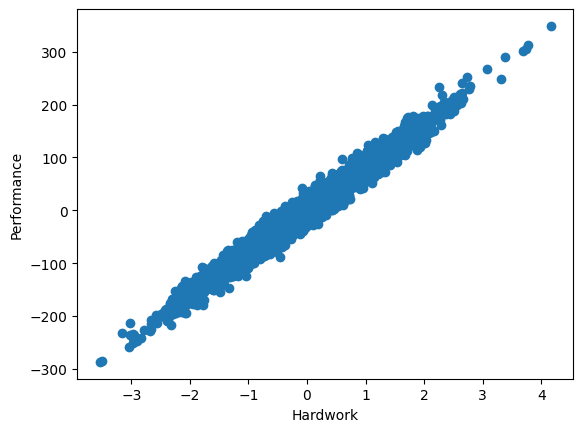

In [8]:
# Load data
X = pd.read_csv('Training Data/Linear_X_Train.csv')
y = pd.read_csv('Training Data/Linear_Y_Train.csv')

# convert data to numpy array
X = X.values
y = y.values

# Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std

# visualise
plt.scatter(X,y)
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

In [6]:
X.head(), y.head()

(          x
 0 -0.289307
 1 -0.588810
 2  1.027507
 3 -0.259013
 4  0.782043,
            y
 0  -0.091101
 1 -53.467721
 2  75.457009
 3 -12.025286
 4  57.414187)

In [4]:
X.shape, y.shape

((3750, 1), (3750, 1))

## Linear Regression

In [23]:
def hypothesis(x, theta):
    # theta = [theta0, theta1]
    y_ = theta[0] + theta[1]*x
    return y_

def gradiant(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros(2)
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        x = X[i]
        y = Y[i]
        grad[0] += y_ - y
        grad[1] += (y_ - y)*x
        
    return grad/m

def error(X, Y, theta):
    m = X.shape[0]
    total_err = 0.0
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        y = Y[i]
        
        total_err += (y_ - y)**2
        
    return total_err/m


def gradiantDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(max_steps):
        grad = gradiant(X, Y, theta)
        
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta, error_list



In [24]:
theta, error_list = gradiantDescent(X,y)

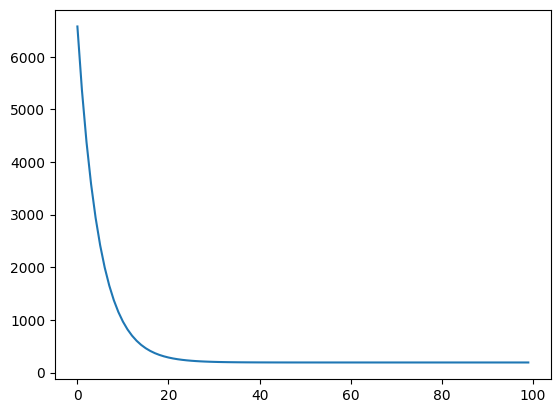

In [26]:
plt.plot(error_list)
plt.show()

In [27]:
y_ = hypothesis(X, theta)
y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

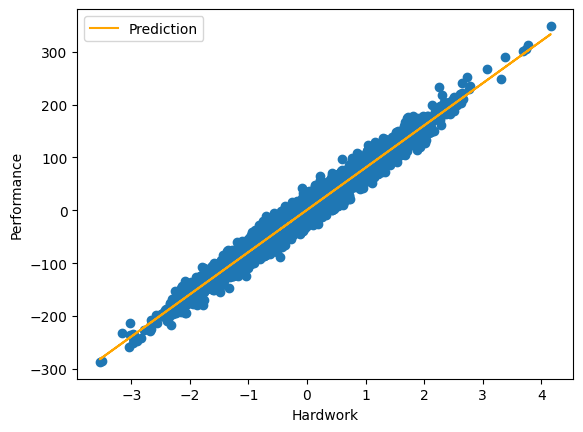

In [31]:
plt.scatter(X,y)
plt.plot(X,y_, label='Prediction',color='orange')
plt.legend()
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

In [47]:
X_test = pd.read_csv('Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test, theta)
y_test

array([[-149.37069577],
       [ -68.75494042],
       [-201.48687035],
       ...,
       [  10.9121384 ],
       [ -21.53235759],
       [ -53.68460035]])

In [48]:
df = pd.DataFrame(data=y_test,columns=["y"])
df.to_csv('y_prediciton.csv', index=False)

# Computing Score
Score: R2 (R-Squared) or Coefficiant of Determination

In [49]:
def r2_score(Y, Y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = 1-num/denom
    return score*100

In [50]:
r2_score(y,y_)

97.09612226971643